# Compute wind from tilt angle (M300)

In [2]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import cmocean 
sns.set_theme(style="darkgrid")

In [3]:
file = "/indian/UAS_project_data/2025_11_03_Arluno/MAVIC/FlightRecords/DJIFlightRecord_2025-11-03_[14-34-32].csv"

fr_df = pd.read_csv(file[:-3] + "csv")

# Convert to datetime
fr_df['CUSTOM.dateTime_dt'] = pd.to_datetime(fr_df['CUSTOM.dateTime'], format='ISO8601',utc=True)
fr_df['CUSTOM.dateTime_dt']

# Filter sampling errors.
median_time = fr_df['CUSTOM.dateTime_dt'].median()
i_to_drop = fr_df.loc[(fr_df['CUSTOM.dateTime_dt'] > median_time+pd.Timedelta(1,'day')) | (fr_df['CUSTOM.dateTime_dt'] < median_time-pd.Timedelta(1,'day'))].index
print(f"Dropping {len(i_to_drop)} rows with datetime errors.")
fr_df.drop(axis=0, index=i_to_drop,inplace=True)

fr_df

Dropping 0 rows with datetime errors.


/tmp/ipykernel_161455/2806061515.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  fr_df = pd.read_csv(file[:-3] + "csv")


,CUSTOM.dateTime,OSD.flyTime,OSD.latitude,OSD.longitude,OSD.height,OSD.heightMax,OSD.vpsHeight,OSD.altitude,OSD.xSpeed,OSD.xSpeedMax,...,DETAILS.maxVerticalSpeed,DETAILS.photoNum,DETAILS.videoTime,DETAILS.aircraftName,DETAILS.aircraftSerial,DETAILS.cameraSerial,DETAILS.rcSerial,DETAILS.appPlatform,DETAILS.appVersion,CUSTOM.dateTime_dt
0,2025-11-03T13:34:32.301Z,0.0,45.520442,8.942680,0.0,0.0,0.1,79.389330,0.0,0.0,...,3.2,1,0,UNIMIB-03-MV2P,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:34:32.301000+00:00
1,2025-11-03T13:34:32.409Z,0.1,45.520442,8.942680,0.0,0.0,0.1,79.389330,0.0,0.0,...,3.2,1,0,UNIMIB-03-MV2P,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:34:32.409000+00:00
2,2025-11-03T13:34:32.510Z,0.2,45.520442,8.942680,0.0,0.0,0.1,79.389330,0.0,0.0,...,3.2,1,0,UNIMIB-03-MV2P,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:34:32.510000+00:00
3,2025-11-03T13:34:32.619Z,0.3,45.520442,8.942680,0.0,0.0,0.1,79.389330,0.0,0.0,...,3.2,1,0,UNIMIB-03-MV2P,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:34:32.619000+00:00
4,2025-11-03T13:34:32.725Z,0.4,45.520442,8.942680,0.0,0.0,0.1,79.389330,0.0,0.0,...,3.2,1,0,UNIMIB-03-MV2P,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:34:32.725000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9761,2025-11-03T13:50:48.865Z,976.5,45.520428,8.942666,0.2,20.7,0.0,79.589325,0.0,1.0,...,3.2,1,0,UNIMIB-03-MV2P,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:50:48.865000+00:00
9762,2025-11-03T13:50:48.970Z,976.6,45.520428,8.942666,0.2,20.7,0.0,79.589325,0.0,1.0,...,3.2,1,0,UNIMIB-03-MV2P,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:50:48.970000+00:00
9763,2025-11-03T13:50:48.970Z,976.7,45.520428,8.942666,0.2,20.7,0.0,79.589325,0.0,1.0,...,3.2,1,0,UNIMIB-03-MV2P,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:50:48.970000+00:00
9764,2025-11-03T13:50:49.080Z,976.8,45.520428,8.942666,0.2,20.7,0.0,79.589325,0.0,1.0,...,3.2,1,0,UNIMIB-03-MV2P,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:50:49.080000+00:00


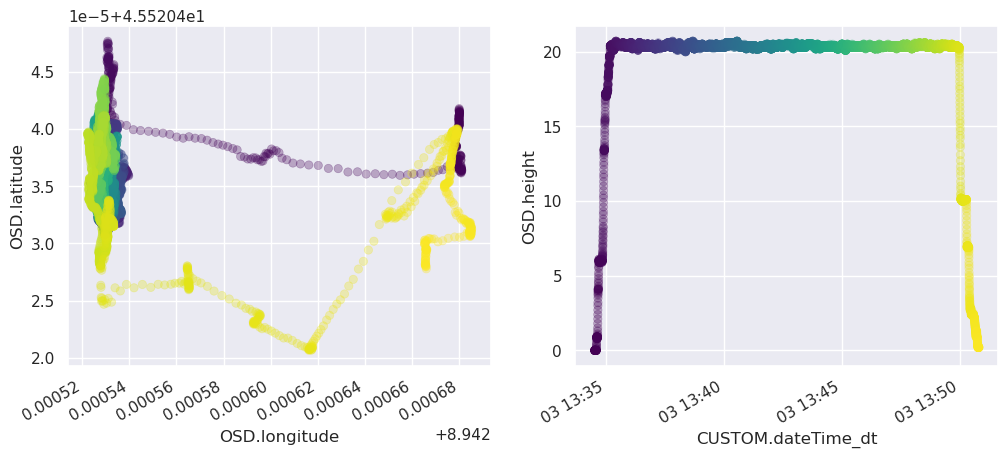

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot trajectory
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(
        data=fr_df,
        x='OSD.longitude',
        y='OSD.latitude',
        hue='CUSTOM.dateTime_dt',
        legend=False,
        ax=axes[0],
        edgecolor=None,
        alpha=0.3,
        palette='viridis',
    )

sns.scatterplot(
        data=fr_df,
        x='CUSTOM.dateTime_dt',
        y='OSD.height',
        hue='CUSTOM.dateTime_dt',
        legend=False,
        ax=axes[1],
        edgecolor=None,
        alpha=0.3,
        palette='viridis',    
    )

fig.autofmt_xdate(rotation=30, ha='right')


# Tilt angle method

In [5]:
### Parameters for wind computation from attitude (Bramati) for Mavic 3!!!
# Wind speed from Direct Model
c3 = -5.56*1e-4
c2 = -1.75*1e-3
c1 = 0.88
c0 = 0
# Wind speed from C_A Model
c0 = 1.487
c1 = 26.123
c2 = 1.55
g = 9.81 #m/s^2
m = 0.951 #kg without instruments, https://ag.dji.com/it/mavic-3-m/specs
rho = 1.2 #kg/m^3 # density air
A = 0.2 #A0 is used as a reference area: in this case, the cross-section area ### Random value here


fr_df = fr_df.assign(tilt = np.arctan(np.sqrt(np.cos(fr_df['OSD.roll'])**2 * np.sin(fr_df['OSD.pitch'])**2 + np.sin(fr_df['OSD.roll'])**2)) / (np.cos(fr_df['OSD.roll'])**2 * np.cos(fr_df['OSD.pitch'])))
# Compute wind speed from Direct Model
fr_df = fr_df.assign(ws_dm = c3 * fr_df.tilt**3 + c2* fr_df.tilt**2 + c1 * fr_df.tilt + c0)
# Compute wind speed from CA method
fr_df = fr_df.assign(ws_CA = c0 + c1 * np.exp(-fr_df.tilt/c2))
# Compute wind direction
fr_df = fr_df.assign(wdir = np.arctan((np.cos(fr_df['OSD.roll'])*np.sin(fr_df['OSD.pitch']))/-np.sin(fr_df['OSD.pitch'])))


/home/lorenzo/miniconda3/envs/uas_analysis/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


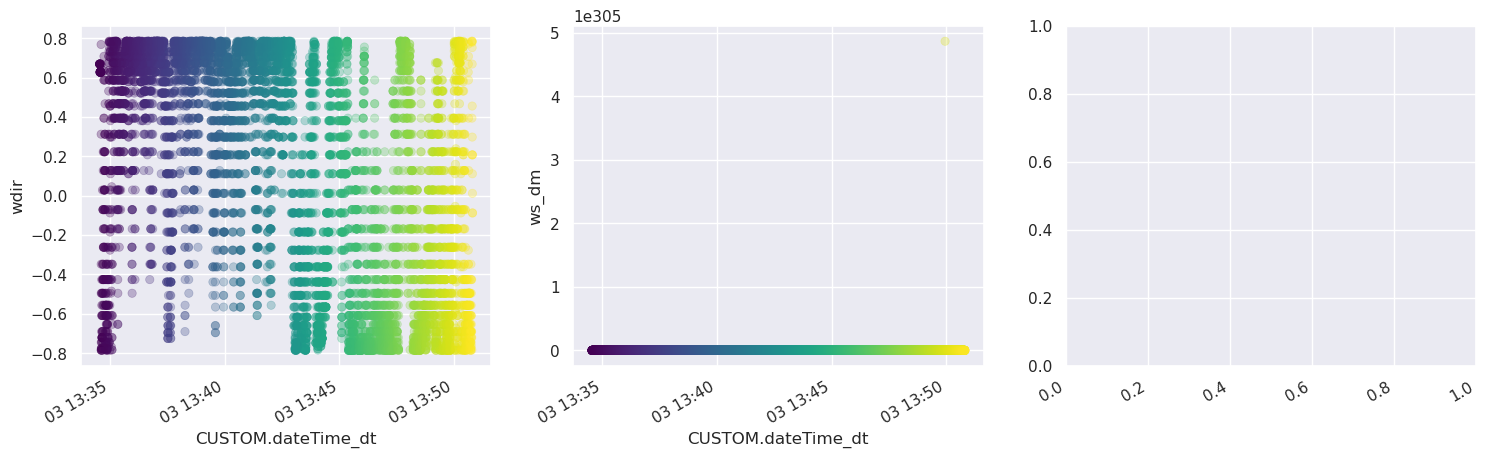

In [6]:
# Plot trajectory
fig,axes=plt.subplots(1,3,figsize=(18,5))

sns.scatterplot(
        data=fr_df,
        x='CUSTOM.dateTime_dt',
        y='wdir',
        hue='CUSTOM.dateTime_dt',
        legend=False,
        ax=axes[0],
        edgecolor=None,
        alpha=0.3,
        palette='viridis',    
    )

sns.scatterplot(
        data=fr_df,
        x='CUSTOM.dateTime_dt',
        y='ws_dm',
        hue='CUSTOM.dateTime_dt',
        legend=False,
        ax=axes[1],
        edgecolor=None,
        alpha=0.3,
        palette='viridis',    
    )

sns.scatterplot(
        data=fr_df,
        x='CUSTOM.dateTime_dt',
        y='ws_CA',
        hue='CUSTOM.dateTime_dt',
        legend=False,
        ax=axes[1],
        edgecolor=None,
        alpha=0.3,
        palette='viridis',    
    )

fig.autofmt_xdate(rotation=30, ha='right')


In [7]:
fr_df.drop(axis=0, index=fr_df.loc[(fr_df['ws_dm'] > 25) | (fr_df['ws_dm'] > 25) | (fr_df['ws_dm'] < 0) | (fr_df['ws_dm'] < 0)].index, inplace=True)
fr_df

,CUSTOM.dateTime,OSD.flyTime,OSD.latitude,OSD.longitude,OSD.height,OSD.heightMax,OSD.vpsHeight,OSD.altitude,OSD.xSpeed,OSD.xSpeedMax,...,DETAILS.aircraftSerial,DETAILS.cameraSerial,DETAILS.rcSerial,DETAILS.appPlatform,DETAILS.appVersion,CUSTOM.dateTime_dt,tilt,ws_dm,ws_CA,wdir
50,2025-11-03T13:34:37.336Z,5.0,45.520439,8.942678,0.8,0.8,0.8,80.189330,0.0,0.0,...,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:34:37.336000+00:00,0.459276,13.811550,20.910998,-0.775331
51,2025-11-03T13:34:37.440Z,5.1,45.520439,8.942679,0.8,0.8,0.9,80.189330,0.0,0.0,...,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:34:37.440000+00:00,0.228033,7.524510,24.036160,-0.775331
52,2025-11-03T13:34:37.550Z,5.2,45.520438,8.942679,0.9,0.9,0.9,80.289330,0.0,0.0,...,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:34:37.550000+00:00,0.000000,1.487000,27.610000,NaN
53,2025-11-03T13:34:37.658Z,5.3,45.520439,8.942678,0.9,0.9,0.9,80.289330,0.0,0.0,...,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:34:37.658000+00:00,0.204174,6.885258,24.385942,NaN
54,2025-11-03T13:34:37.768Z,5.4,45.520439,8.942679,0.9,0.9,1.0,80.289330,0.0,0.0,...,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:34:37.768000+00:00,0.488698,14.623372,20.545766,-0.744330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9736,2025-11-03T13:50:46.311Z,974.0,45.520429,8.942666,0.3,20.7,0.1,79.689330,0.0,1.0,...,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:50:46.311000+00:00,0.765059,22.379621,17.433347,-0.690000
9740,2025-11-03T13:50:46.743Z,974.4,45.520429,8.942666,0.3,20.7,0.1,79.689330,0.0,1.0,...,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:50:46.743000+00:00,0.591787,17.488971,19.319416,-0.720291
9741,2025-11-03T13:50:46.851Z,974.5,45.520430,8.942666,0.3,20.7,0.0,79.689330,0.0,1.0,...,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:50:46.851000+00:00,0.142031,5.228554,25.322664,-0.782894
9742,2025-11-03T13:50:46.953Z,974.6,45.520429,8.942666,0.2,20.7,0.0,79.589325,0.0,1.0,...,163DFAQ0017J47,0K8TFA90020632,0VELF9K0070064,IOS,4.3.64,2025-11-03 13:50:46.953000+00:00,0.314837,9.865117,22.808060,NaN


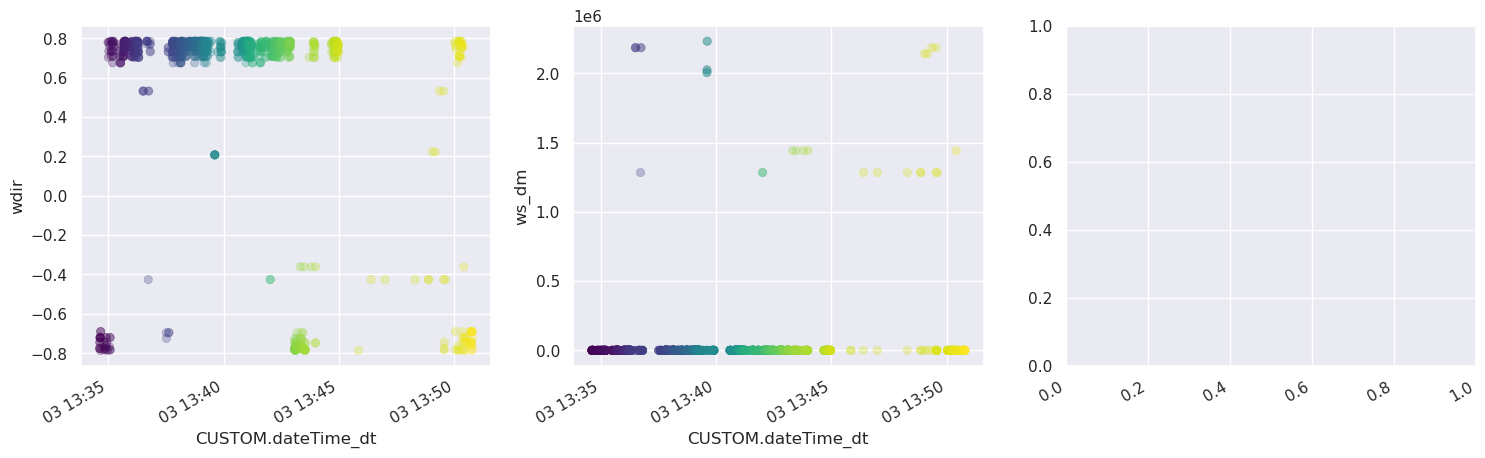

In [8]:
# Plot trajectory
fig,axes=plt.subplots(1,3,figsize=(18,5))

sns.scatterplot(
        data=fr_df,
        x='CUSTOM.dateTime_dt',
        y='wdir',
        hue='CUSTOM.dateTime_dt',
        legend=False,
        ax=axes[0],
        edgecolor=None,
        alpha=0.3,
        palette='viridis',    
    )

sns.scatterplot(
        data=fr_df,
        x='CUSTOM.dateTime_dt',
        y='ws_dm',
        hue='CUSTOM.dateTime_dt',
        legend=False,
        ax=axes[1],
        edgecolor=None,
        alpha=0.3,
        palette='viridis',    
    )

sns.scatterplot(
        data=fr_df,
        x='CUSTOM.dateTime_dt',
        y='ws_CA',
        hue='CUSTOM.dateTime_dt',
        legend=False,
        ax=axes[1],
        edgecolor=None,
        alpha=0.3,
        palette='viridis',    
    )

fig.autofmt_xdate(rotation=30, ha='right')
